In [64]:
import pandas as pd
df = pd.read_csv('sensor_data_with_noise (1).csv')


In [65]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)


Empty DataFrame
Columns: [Timestamp, Temperature (°C), Humidity (%), Sensor Drift]
Index: []


In [67]:
print(df.isnull().sum())


Timestamp           0
Temperature (°C)    0
Humidity (%)        0
Sensor Drift        0
dtype: int64


In [68]:
df.fillna(method='ffill', inplace=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_5936\4000742557.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [69]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Timestamp, Temperature (°C), Humidity (%), Sensor Drift]
Index: []


In [70]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0


In [71]:
import numpy as np

# Select the Temperature column from your uploaded data
temperature_data = df['Temperature (°C)']

# Calculate IQR
Q1 = temperature_data.quantile(0.25)
Q3 = temperature_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (temperature_data < (Q1 - 1.5 * IQR)) | (temperature_data > (Q3 + 1.5 * IQR))

# Remove outliers
df_cleaned = df[~outliers]


In [72]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the temperature column
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Create a new DataFrame with scaled temperature
df_scaled = pd.DataFrame({
    'Timestamp': df['Timestamp'],
    'Temperature (°C) - Scaled': temperature_scaled.flatten()
})

# Print first 5 rows
print(df_scaled.head())


             Timestamp  Temperature (°C) - Scaled
0  2025-05-28 10:00:00                   0.344935
1  2025-05-28 10:01:00                  -0.100495
2  2025-05-28 10:02:00                   0.502651
3  2025-05-28 10:03:00                   1.171584
4  2025-05-28 10:04:00                  -0.102598


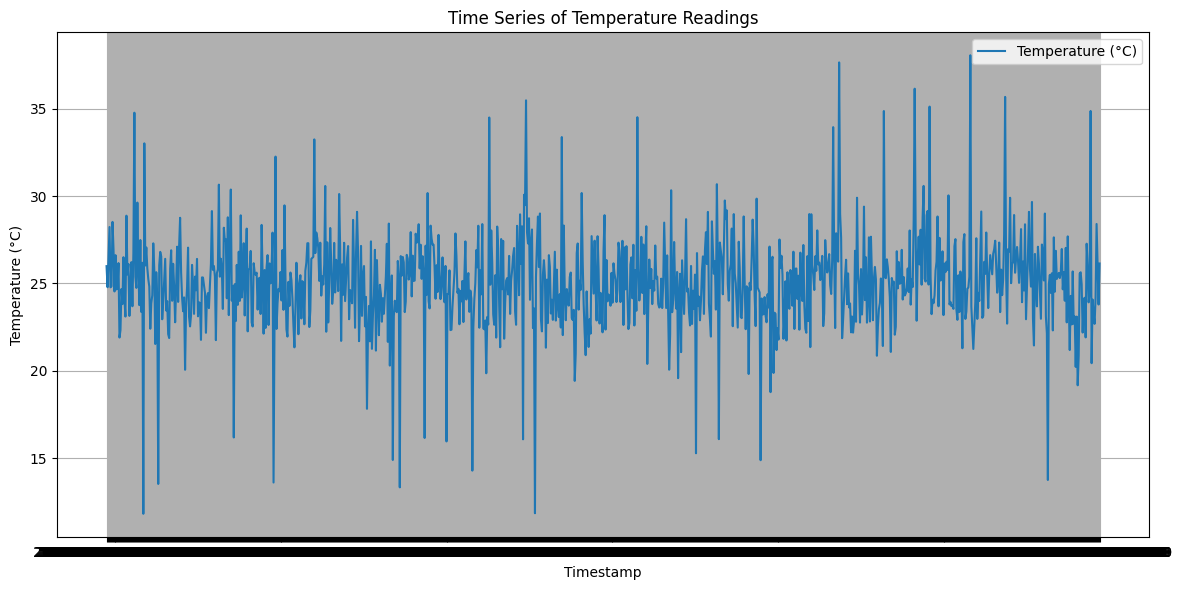

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)', color='tab:blue')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature Readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


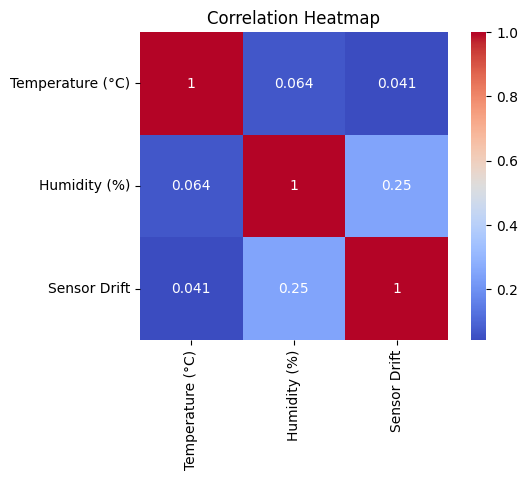

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for all numeric columns
correlation_matrix = df[['Temperature (°C)', 'Humidity (%)', 'Sensor Drift']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()


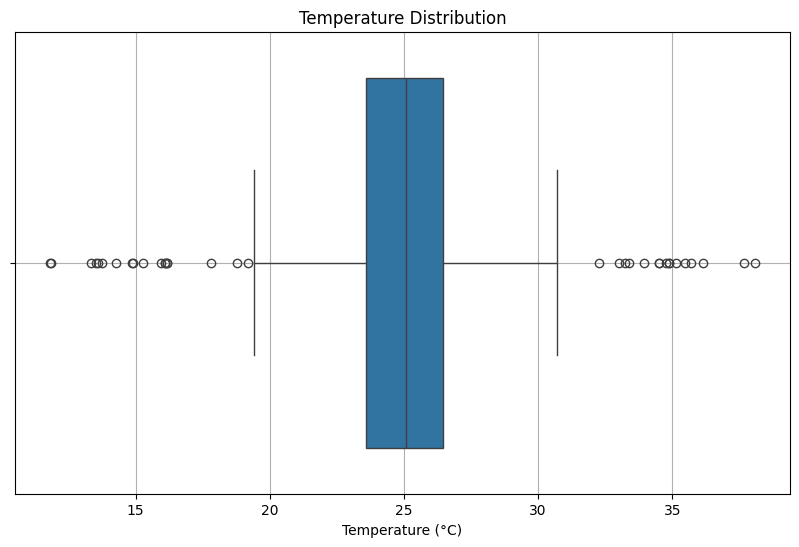

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot of temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature (°C)'])
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.grid(True)
plt.show()



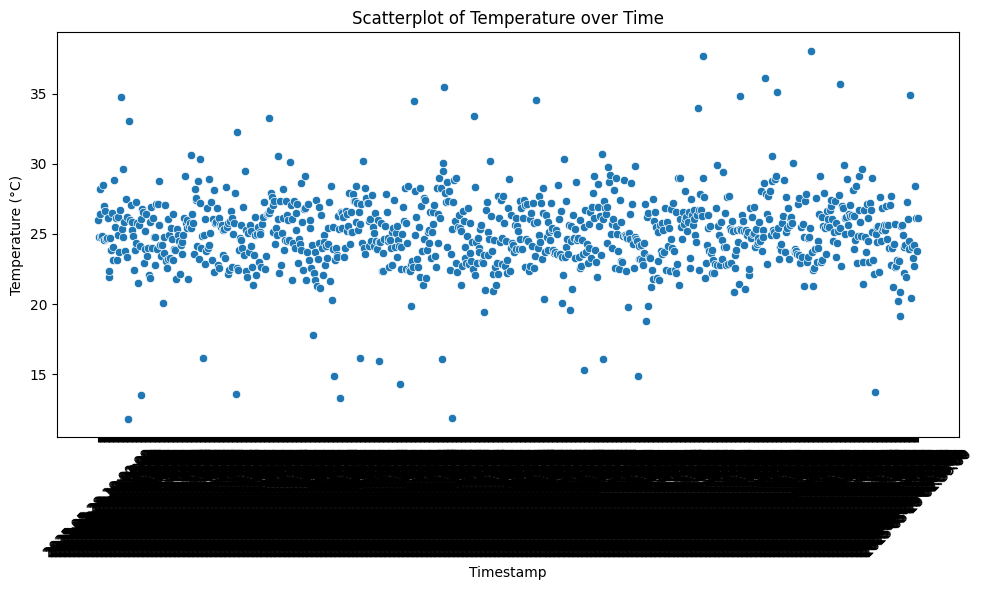

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of temperature over time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Timestamp'], y=df['Temperature (°C)'])
plt.title("Scatterplot of Temperature over Time")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


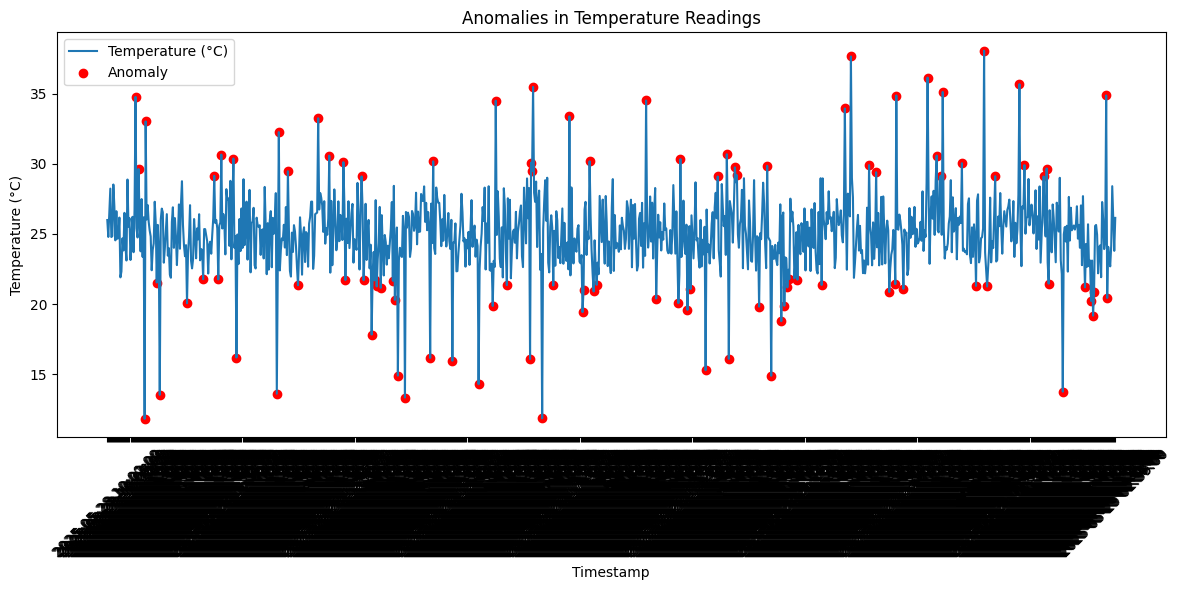

              Timestamp  Temperature (°C)  Humidity (%)  Sensor Drift  anomaly
28  2025-05-28 10:28:00         34.780678     52.919123     -0.034931       -1
31  2025-05-28 10:31:00         29.633613     51.087839     -0.018281       -1
37  2025-05-28 10:37:00         11.808033     52.245077     -0.042498       -1
38  2025-05-28 10:38:00         33.026431     56.469048     -0.043022       -1
49  2025-05-28 10:49:00         21.533634     58.772176     -0.027110       -1


In [77]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the Temperature data
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Fit Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(temperature_scaled)

# Predict anomalies (-1 indicates anomaly)
df['anomaly'] = model.predict(temperature_scaled)

# Extract anomalies
anomalies = df[df['anomaly'] == -1]

# Plot temperature and anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)')
plt.scatter(anomalies['Timestamp'], anomalies['Temperature (°C)'], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Anomalies in Temperature Readings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display detected anomalies
print(anomalies.head())


In [78]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the Temperature column
temperature_scaled = min_max_scaler.fit_transform(df[['Temperature (°C)']])

# Create a new DataFrame with scaled temperature and Timestamp
df_scaled = pd.DataFrame({
    'Timestamp': df['Timestamp'],
    'Temperature (°C) - Scaled': temperature_scaled.flatten()
})

# Display first 5 rows
print(df_scaled.head())


             Timestamp  Temperature (°C) - Scaled
0  2025-05-28 10:00:00                   0.540110
1  2025-05-28 10:01:00                   0.494150
2  2025-05-28 10:02:00                   0.556384
3  2025-05-28 10:03:00                   0.625406
4  2025-05-28 10:04:00                   0.493933


In [79]:
import pandas as pd
from sklearn.decomposition import PCA

# Create a lagged temperature column
df['Temp_lag1'] = df['Temperature (°C)'].shift(1).fillna(method='bfill')

# Apply PCA on the temperature and lagged temperature
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Temperature (°C)', 'Temp_lag1']])

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Timestamp'] = df['Timestamp']

# Display first 5 rows
print(principal_df.head())


        PC1       PC2            Timestamp
0  1.322063  0.000645  2025-05-28 10:00:00
1  0.468165  0.853849  2025-05-28 10:01:00
2  0.771205 -1.155352  2025-05-28 10:02:00
3  3.208866 -1.280424  2025-05-28 10:03:00
4  2.047548  2.442580  2025-05-28 10:04:00


C:\Users\HP\AppData\Local\Temp\ipykernel_5936\2460734169.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temp_lag1'] = df['Temperature (°C)'].shift(1).fillna(method='bfill')


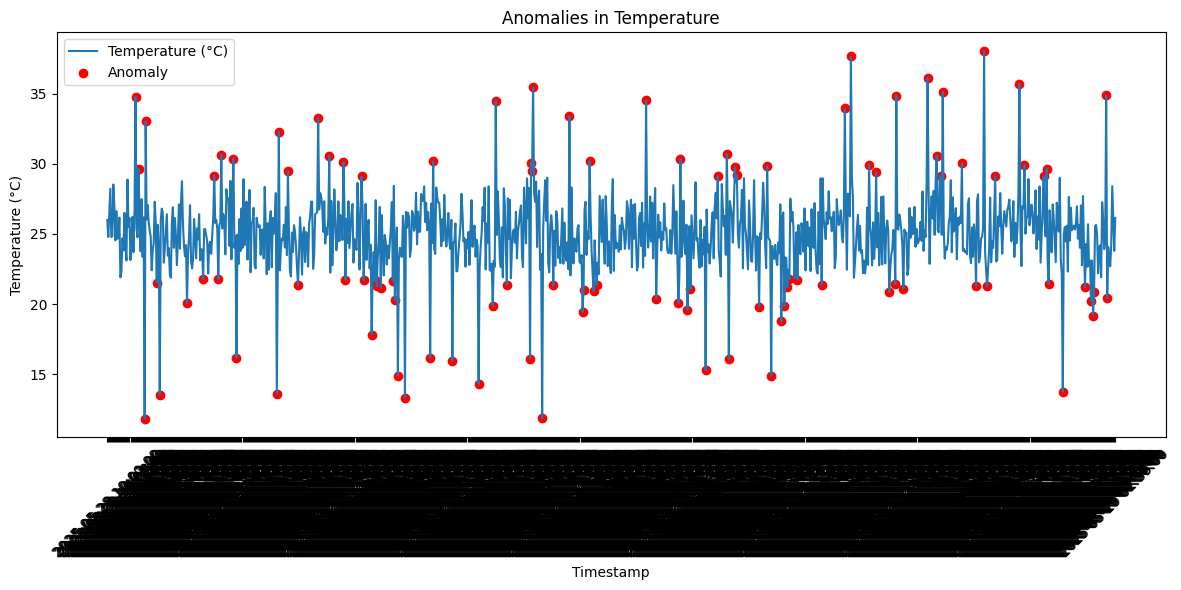

              Timestamp  Temperature (°C)  Humidity (%)  Sensor Drift  \
28  2025-05-28 10:28:00         34.780678     52.919123     -0.034931   
31  2025-05-28 10:31:00         29.633613     51.087839     -0.018281   
37  2025-05-28 10:37:00         11.808033     52.245077     -0.042498   
38  2025-05-28 10:38:00         33.026431     56.469048     -0.043022   
49  2025-05-28 10:49:00         21.533634     58.772176     -0.027110   

    anomaly  Temp_lag1  
28       -1  26.743296  
31       -1  24.747059  
37       -1  26.186795  
38       -1  11.808033  
49       -1  25.809574  


In [80]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scale the Temperature column
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Fit Isolation Forest model on scaled temperature
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(temperature_scaled)

# Predict anomalies (-1 indicates anomaly)
df['anomaly'] = model.predict(temperature_scaled)

# Extract anomalies
anomalies = df[df['anomaly'] == -1]

# Plot temperature and anomalies over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)')
plt.scatter(anomalies['Timestamp'], anomalies['Temperature (°C)'], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Anomalies in Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display detected anomalies
print(anomalies.head())


In [81]:
import pandas as pd

# Select rows without anomalies (anomaly == 1)
data_cleaned_no_anomalies = df[df['anomaly'] == 1].copy()

# Drop the 'anomaly' column
data_cleaned_no_anomalies = data_cleaned_no_anomalies.drop(columns=['anomaly'])

# Save cleaned data to CSV
data_cleaned_no_anomalies.to_csv('temperature_data_cleaned.csv', index=False)




In [83]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Scale the Temperature data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Run DBSCAN clustering
dbscan = DBSCAN(eps=0.05, min_samples=5)  # eps adjusted for 1D data
dbscan.fit(temperature_scaled)

# Assign cluster labels to the dataframe
df['dbscan_anomaly'] = dbscan.labels_

# DBSCAN labels -1 are considered anomalies
dbscan_anomalies = df[df['dbscan_anomaly'] == -1]

# Display anomalies
print(dbscan_anomalies.head())

print(dbscan_anomalies.head())



               Timestamp  Temperature (°C)  Humidity (%)  Sensor Drift  \
37   2025-05-28 10:37:00         11.808033     52.245077     -0.042498   
431  2025-05-28 17:11:00         11.840993     54.408419     -0.286473   
737  2025-05-28 22:17:00         37.661848     40.138460     -0.178714   
869  2025-05-29 00:29:00         38.071911     63.173393     -0.092345   

     anomaly  Temp_lag1  dbscan_anomaly  
37        -1  26.186795              -1  
431       -1  23.575835              -1  
737       -1  26.252251              -1  
869       -1  25.390377              -1  
               Timestamp  Temperature (°C)  Humidity (%)  Sensor Drift  \
37   2025-05-28 10:37:00         11.808033     52.245077     -0.042498   
431  2025-05-28 17:11:00         11.840993     54.408419     -0.286473   
737  2025-05-28 22:17:00         37.661848     40.138460     -0.178714   
869  2025-05-29 00:29:00         38.071911     63.173393     -0.092345   

     anomaly  Temp_lag1  dbscan_anomaly  
37    

In [84]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Scale the temperature data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df[['Temperature (°C)']])

# Train One-Class SVM model
ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
ocsvm.fit(temperature_scaled)

# Predict anomalies (-1 means anomaly)
df['ocsvm_anomaly'] = ocsvm.predict(temperature_scaled)

# Extract anomalies
ocsvm_anomalies = df[df['ocsvm_anomaly'] == -1]

# Display detected anomalies
print(ocsvm_anomalies.head())


              Timestamp  Temperature (°C)  Humidity (%)  Sensor Drift  \
28  2025-05-28 10:28:00         34.780678     52.919123     -0.034931   
31  2025-05-28 10:31:00         29.633613     51.087839     -0.018281   
37  2025-05-28 10:37:00         11.808033     52.245077     -0.042498   
38  2025-05-28 10:38:00         33.026431     56.469048     -0.043022   
52  2025-05-28 10:52:00         13.517579     57.129131      0.030379   

    anomaly  Temp_lag1  dbscan_anomaly  ocsvm_anomaly  
28       -1  26.743296               1             -1  
31       -1  24.747059               0             -1  
37       -1  26.186795              -1             -1  
38       -1  11.808033               1             -1  
52       -1  24.163844               2             -1  


In [85]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
import pandas as pd

# Select the Temperature column for imputation
data_numeric = df[['Temperature (°C)']]

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_numeric)

# Create new DataFrame with imputed values and original timestamps
df_imputed = pd.DataFrame(data_imputed, columns=['Temperature (°C)'])
df_imputed['Timestamp'] = df['Timestamp'].values

# Detect anomalies using Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(df_imputed[['Temperature (°C)']])
df_imputed['Anomaly'] = iso.predict(df_imputed[['Temperature (°C)']])

# Remove outliers (keep only normal points)
df_cleaned = df_imputed[df_imputed['Anomaly'] == 1].drop(columns=['Anomaly'])

# Display results
print("Missing Values After Imputation:")
print(df_cleaned.isnull().sum())
print(f"Number of Outliers Removed: {len(df) - len(df_cleaned)}")


Missing Values After Imputation:
Temperature (°C)    0
Timestamp           0
dtype: int64
Number of Outliers Removed: 10


In [86]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Define a threshold to classify anomalies (e.g., temperature > 28°C)
threshold = 28
df['Anomaly'] = np.where(df['Temperature (°C)'] > threshold, 1, 0)

# Display original class distribution
print("Original class distribution:")
print(df['Anomaly'].value_counts())

# Check if there are enough minority samples for SMOTE
minority_class_count = df['Anomaly'].value_counts().min()

if minority_class_count > 1:
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_resampled, y_resampled = smote.fit_resample(df[['Temperature (°C)']], df['Anomaly'])

    # Display new class distribution
    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_resampled).value_counts())
else:
    print("\nNot enough anomaly samples to apply SMOTE. Try lowering the threshold or using another method.")


Original class distribution:
Anomaly
0    906
1     94
Name: count, dtype: int64

Class distribution after SMOTE:
Anomaly
0    906
1    906
Name: count, dtype: int64


In [87]:
# Calculate the ratio of current to previous temperature
df['Temp_Ratio'] = df['Temperature (°C)'] / df['Temperature (°C)'].shift(1)

# Fill NaN in the first row (since there is no previous value)
df['Temp_Ratio'].fillna(1, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_5936\1848338781.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temp_Ratio'].fillna(1, inplace=True)


Number of features before RFE: 6
Selected Features Shape: (997, 3)
Selected feature indices (True means selected):
[ True False False False  True  True]
Decision Tree Accuracy: 1.00
Confusion Matrix:
[[185   0]
 [  0  15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        15

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Feature Importances: [1. 0. 0.]


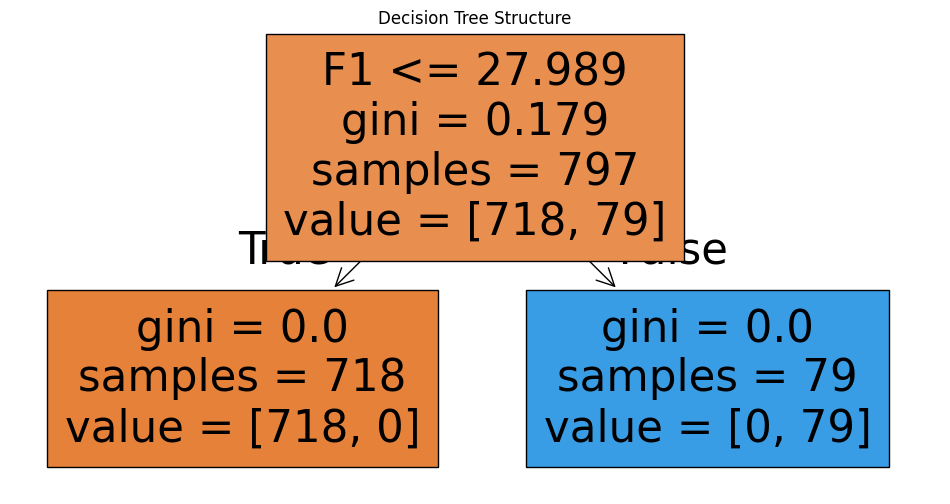

In [88]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create lag features
df['temp_lag1'] = df['Temperature (°C)'].shift(1)
df['temp_lag2'] = df['Temperature (°C)'].shift(2)
df['temp_lag3'] = df['Temperature (°C)'].shift(3)

# Rolling statistics
df['temp_roll_mean'] = df['Temperature (°C)'].rolling(window=3).mean()
df['temp_roll_std'] = df['Temperature (°C)'].rolling(window=3).std()

# Drop NaNs
df_features = df.dropna().reset_index(drop=True)

# Binary anomaly label
df_features['Anomaly'] = (df_features['Temperature (°C)'] > 28).astype(int)

# Define features and target
X = df_features[['Temperature (°C)', 'temp_lag1', 'temp_lag2', 'temp_lag3', 'temp_roll_mean', 'temp_roll_std']]
y = df_features['Anomaly']

# RFE with Random Forest
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

print(f"Number of features before RFE: {X.shape[1]}")
print(f"Selected Features Shape: {X_rfe.shape}")
print("Selected feature indices (True means selected):")
print(rfe.support_)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation
print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

# Feature importance
print("Feature Importances:", model.feature_importances_)

# Visualization
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=['F1', 'F2', 'F3'])  # Replace with actual selected names if known
plt.title("Decision Tree Structure")
plt.show()


Decision Tree Accuracy: 1.00


In [89]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Engineering
df['temp_lag1'] = df['Temperature (°C)'].shift(1)
df['temp_lag2'] = df['Temperature (°C)'].shift(2)
df['temp_lag3'] = df['Temperature (°C)'].shift(3)
df['temp_roll_mean'] = df['Temperature (°C)'].rolling(window=3).mean()
df['temp_roll_std'] = df['Temperature (°C)'].rolling(window=3).std()

# Drop NaNs from lag/rolling
df_features = df.dropna().reset_index(drop=True)

# Create binary target for anomaly
df_features['Anomaly'] = (df_features['Temperature (°C)'] > 28).astype(int)

# Define features and target
X = df_features[['Temperature (°C)', 'temp_lag1', 'temp_lag2', 'temp_lag3', 'temp_roll_mean', 'temp_roll_std']]
y = df_features['Anomaly']

# Recursive Feature Elimination
base_estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=base_estimator, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest
clf = RandomForestClassifier(
    random_state=42,
    n_estimators=30,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    max_samples=0.8,
    warm_start=True
)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Train model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Print accuracy score
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Random Forest Accuracy: 1.00
Confusion Matrix:
[[185   0]
 [  0  15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        15

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Forest Accuracy: 1.00


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        15

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



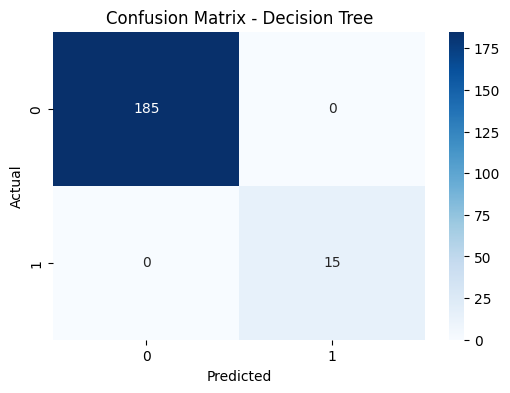

ROC AUC Score - Decision Tree: 1.00


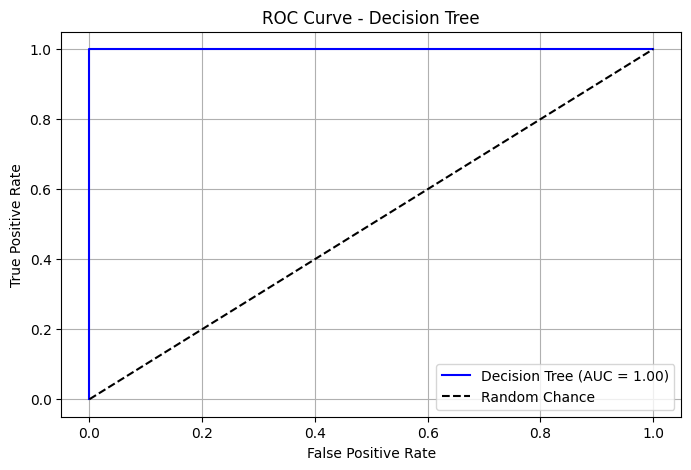


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        15

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



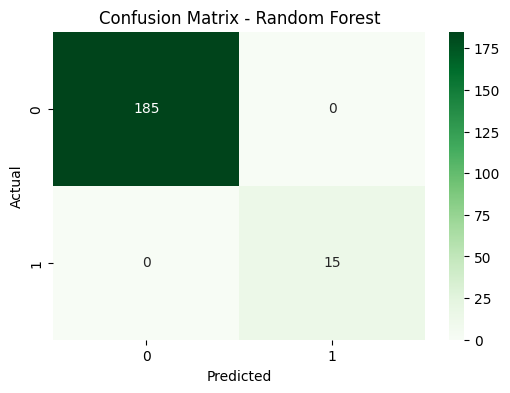

ROC AUC Score - Random Forest: 1.00


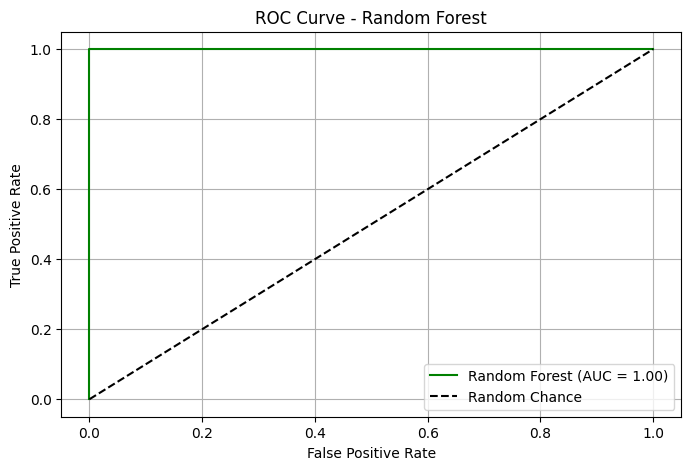

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Evaluation
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, predictions))

conf_matrix_dt = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC for Decision Tree
roc_auc_dt = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score - Decision Tree: {roc_auc_dt:.2f}")

fpr_dt, tpr_dt, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

# Random Forest Evaluation
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC for Random Forest
roc_auc_rf = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score - Random Forest: {roc_auc_rf:.2f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()
